### Task 03:

In this task, you have to implement the Backpropagation method using Pytorch. This is particularly useful when the hypothesis function contains several weights.

**Backpropagation**: Algorithm to caculate gradient for all the weights in the network with several weights. 

* It uses the `Chain Rule` to calcuate the gradient for multiple nodes at the same time. 
* In pytorch this is implemented using a `variable` data type and `loss.backward()` method to get the gradients

In [2]:
# import the necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preliminaries - Pytorch Basics

In [3]:
# creating a tensor

# zero tensor
zeros = torch.zeros(5)
print(zeros)
# ones
ones = torch.ones(5)
print(ones)
# random normal
random = torch.randn(5)
print(random)


# creating tensors from list and/or numpy arrays
my_list = [0.0, 1.0, 2.0, 3.0, 4.0]
to_tensor = torch.Tensor(my_list)
print("The size of the to_tensor: ", to_tensor.size())

my_array = np.array(my_list) # or
to_tensor = torch.tensor(my_array)
to_tensor = torch.from_numpy(my_array)
print("The size of the to_tensor: ", to_tensor.size())

tensor([0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1., 1.])
tensor([ 0.8607, -1.0401, -0.3258,  0.8999,  0.6351])
The size of the to_tensor:  torch.Size([5])
The size of the to_tensor:  torch.Size([5])


In [4]:
# multi dimenstional tensors

# 2D
two_dim = torch.randn((3, 3))
print(two_dim)
# 3D 
three_dim = torch.randn((3, 3, 3))
print(three_dim)

tensor([[ 1.6727, -0.3045, -1.9060],
        [ 1.4567, -0.6158, -0.0362],
        [ 0.3325,  1.5602, -0.6537]])
tensor([[[-0.2984,  0.5324, -0.6734],
         [-0.2027,  0.2507,  0.0708],
         [-0.2023,  0.0649,  0.9411]],

        [[ 0.0836, -0.9937, -0.6178],
         [ 0.7532,  1.2793, -1.2999],
         [-0.8546,  0.0534, -0.9658]],

        [[ 0.6575, -2.0642,  1.7661],
         [ 0.7572,  0.2299,  1.9890],
         [-0.8458, -0.3393, -1.2135]]])


In [5]:
# tensor shapes and axes

print(zeros.shape)
print(two_dim.shape)
print(three_dim.shape)

# zeroth axis - rows
print(two_dim[:, 0])
# first axis - columns
print(two_dim[0, :])

torch.Size([5])
torch.Size([3, 3])
torch.Size([3, 3, 3])
tensor([1.6727, 1.4567, 0.3325])
tensor([ 1.6727, -0.3045, -1.9060])


In [6]:
print(two_dim[:, 0:2])
print(two_dim[0:2, :])

tensor([[ 1.6727, -0.3045],
        [ 1.4567, -0.6158],
        [ 0.3325,  1.5602]])
tensor([[ 1.6727, -0.3045, -1.9060],
        [ 1.4567, -0.6158, -0.0362]])


In [7]:
rand_tensor = torch.randn(2,3)
print("Tensor Shape : " , rand_tensor.shape)
resized_tensor = rand_tensor.reshape(3,2)
print("Resized Tensor Shape : " , resized_tensor.shape) # or
resized_tensor = rand_tensor.reshape(3,-1)
print("Resized Tensor Shape : " , resized_tensor.shape)
flattened_tensor = rand_tensor.reshape(-1)
print("Flattened Tensor Shape : " , flattened_tensor.shape)

Tensor Shape :  torch.Size([2, 3])
Resized Tensor Shape :  torch.Size([3, 2])
Resized Tensor Shape :  torch.Size([3, 2])
Flattened Tensor Shape :  torch.Size([6])


Determine the derivative of $y = 2x^{3} + x$ at $x = 1$

In [8]:
x = torch.tensor(1.0, requires_grad = True)
y = 2 * (x ** 3) + x
y.backward()
print("Value of Y at x=1 : " , y)
print("Derivative of Y wrt x at x=1 : " , x.grad)

Value of Y at x=1 :  tensor(3., grad_fn=<AddBackward0>)
Derivative of Y wrt x at x=1 :  tensor(7.)


### Task 03 - a
Determine the partial derivative of $y = uv + u^{2}$ at $u=1$ and $v=2$ with respect to $u$ and $v$.

In [9]:
# YOUR CODE STARTS HERE
u = torch.tensor(1.0, requires_grad = True)
v = torch.tensor(2.0, requires_grad = True)
y = u*v + u**2

y.backward()
# YOUR CODE ends HERE
print("Value of y at u=1, v=2 : " , y)
print("Partial Derivative of y wrt u : " , u.grad)
print("Partial Derivative of y wrt v : " , v.grad)

Value of y at u=1, v=2 :  tensor(3., grad_fn=<AddBackward0>)
Partial Derivative of y wrt u :  tensor(4.)
Partial Derivative of y wrt v :  tensor(1.)


#### Hypothesis Function and Loss Function

$y = x * w + b$

$loss =(\hat{y}-y)^2$

Let us make use of a randomly-created sample dataset as follows

In [28]:
#sample-dataset
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

## Task: 03 - b
Declare pytorch tensors for weight and bias and implement the forward and loss function of our model

In [29]:
# Define w = 1 and b = -1 for y = wx + b
# Note that w,b are learnable paramteter 
# i.e., you are going to take the derivative of the tensor(s).
# YOUR CODE STARTS HERE
w = torch.tensor(1., requires_grad = True)
b = torch.tensor(-1., requires_grad = True)
# YOUR CODE ENDS HERE

assert w.item() == 1
assert b.item() == -1
assert w.requires_grad == True
assert b.requires_grad == True

In [30]:
#forward function to calculate y_pred for a given x according to the linear model defined above
def forward(w, b, x):
    #implement the forward model to compute y_pred as w*x + b
    ## YOUR CODE STARTS HERE
    return w*x + b

    ## YOUR CODE ENDS HERE

#loss-function to compute the mean-squared error between y_pred and y_actual
def loss(y_pred, y_actual):
    #calculate the mean-squared-error between y_pred and y_actual
    ## YOUR CODE STARTS HERE
    return (y_pred - y_actual)**2

    ## YOUR CODE ENDS HERE

Calculate $y_{pred}$ for $x=4$ without training the model

In [31]:
y_pred_without_train = forward(w, b, 4)

Begin Training

In [32]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.01 # Let us set learning rate as 0.01
weight_list = []
loss_list=[]

# Training loop
for epoch in range(10):
    total_loss = 0
    count = 0
    
    for x, y in zip(x_data, y_data):
        
        #implement forward pass, compute loss and gradients for the weights and update weights
        ## YOUR CODE STARTS HERE
        y_pred = forward(w, b, x)
        current_loss = loss(y_pred, y)
        current_loss.backward()
        grad = [w.grad, b.grad]
        w.data = w.data - alpha*grad[0].item()
        b.data = b.data - alpha*grad[1].item()
        total_loss += current_loss
        ## YOUR CODE ENDS HERE

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
        b.grad.data.zero_()
        count += 1
        
    avg_mse = total_loss / count        
    print(f"Epoch: {epoch+1} | Loss: {avg_mse.item()} | w: {w.item()}")
    weight_list.append(w)
    loss_list.append(avg_mse)  

Epoch: 1 | Loss: 8.035331726074219 | w: 1.361407995223999
Epoch: 2 | Loss: 3.9245269298553467 | w: 1.6126642227172852
Epoch: 3 | Loss: 1.9271574020385742 | w: 1.7872123718261719
Epoch: 4 | Loss: 0.9558445811271667 | w: 1.9083435535430908
Epoch: 5 | Loss: 0.48289188742637634 | w: 1.9922776222229004
Epoch: 6 | Loss: 0.2521496117115021 | w: 2.0503103733062744
Epoch: 7 | Loss: 0.1392294019460678 | w: 2.090308427810669
Epoch: 8 | Loss: 0.08369665592908859 | w: 2.1177496910095215
Epoch: 9 | Loss: 0.056166838854551315 | w: 2.1364498138427734
Epoch: 10 | Loss: 0.04233689606189728 | w: 2.1490650177001953


Calculate $y_{pred}$ for $x=4$ after training the model

In [34]:
y_pred_with_train = forward(w, b, 4)

print("Actual Y Value for x=4 : 8")
print("Predicted Y Value before training : " , y_pred_without_train.item())
print("Predicted Y Value after training : " , y_pred_with_train.item())

Actual Y Value for x=4 : 8
Predicted Y Value before training :  3.0
Predicted Y Value after training :  8.151883125305176


## Task: 03 - c
Repeat **Task:03 - b** for the quadratic model defined below

#### Using backward propagation for quadratic model

$\hat{y} = x^2*w_{2} + x*w_{1}$

$loss = (\hat{y}-y)^2$

* Using Dummy values of x and y

`x = 1,2,3,4,5`
`y = 1,6,15,28,45`

In [35]:
x_data = [1.0, 2.0, 3.0, 4.0, 5.0]
y_data = [1.0, 6.0, 15.0, 28, 45]

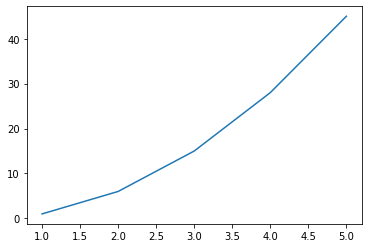

In [36]:
# Visualize the given dataset
plt.plot(x_data,y_data)
plt.show()

In [37]:
# Initialize w2 and w1 with randon values
w_1 = torch.tensor([1.0], requires_grad=True)
w_2 = torch.tensor([1.0], requires_grad=True)

In [38]:
#wuadratic-forward function to calculate y_pred for a given x according to the quadratic model defined above
def quad_forward(w1, w2, x):
    #implement the forward model to compute y_pred as w1*x + w2*(x^2)
    ## YOUR CODE STARTS HERE
    return w1*x + w2*(x**2)

    ## YOUR CODE ENDS HERE

#loss-function to compute the mean-squared error between y_pred and y_actual
def loss(y_pred, y_actual):
    #calculate the mean-squared-error between y_pred and y_actual
    ## YOUR CODE STARTS HERE
    return (y_pred - y_actual)**2

    ## YOUR CODE ENDS HERE

Calculate $y_{pred}$ for $x=6$ without training the model

In [39]:
y_pred_without_train = quad_forward(w_1, w_2, 6)

Begin Training

In [40]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.0012 # Let us set learning rate as 0.01
weight_list = []
loss_list=[]

# Training loop
for epoch in range(100):
    total_loss = 0
    count = 0
    
    for x, y in zip(x_data, y_data):
        
        #implement forward pass, compute loss and gradients for the weights and update weights
        ## YOUR CODE STARTS HERE
        y_pred = forward(w_1, w_2, x)
        current_loss = loss(y_pred, y)
        current_loss.backward()
        grad = [w_1.grad, w_2.grad]
        w_1.data = w_1.data - alpha*grad[0].item()
        w_2.data = w_2.data - alpha*grad[1].item()
        total_loss += current_loss
        ## YOUR CODE ENDS HERE
        
        # Manually zero the gradients after updating weights
        w_1.grad.data.zero_()
        w_2.grad.data.zero_()
        
        count += 1
        
    avg_mse = total_loss / count        
    print(f"Epoch: {epoch+1} | Loss: {avg_mse.item()} | w: {w.item()}")
    weight_list.append(w)
    loss_list.append(avg_mse)

Epoch: 1 | Loss: 407.6036682128906 | w: 2.1490650177001953
Epoch: 2 | Loss: 319.4317932128906 | w: 2.1490650177001953
Epoch: 3 | Loss: 253.5703582763672 | w: 2.1490650177001953
Epoch: 4 | Loss: 204.37718200683594 | w: 2.1490650177001953
Epoch: 5 | Loss: 167.63479614257812 | w: 2.1490650177001953
Epoch: 6 | Loss: 140.19107055664062 | w: 2.1490650177001953
Epoch: 7 | Loss: 119.6903305053711 | w: 2.1490650177001953
Epoch: 8 | Loss: 104.37223052978516 | w: 2.1490650177001953
Epoch: 9 | Loss: 92.92167663574219 | w: 2.1490650177001953
Epoch: 10 | Loss: 84.35618591308594 | w: 2.1490650177001953
Epoch: 11 | Loss: 77.9421157836914 | w: 2.1490650177001953
Epoch: 12 | Loss: 73.13150024414062 | w: 2.1490650177001953
Epoch: 13 | Loss: 69.51544189453125 | w: 2.1490650177001953
Epoch: 14 | Loss: 66.7886734008789 | w: 2.1490650177001953
Epoch: 15 | Loss: 64.72352600097656 | w: 2.1490650177001953
Epoch: 16 | Loss: 63.15018844604492 | w: 2.1490650177001953
Epoch: 17 | Loss: 61.9421272277832 | w: 2.14906

Calculate $y_{pred}$ for $x=6$ after training the model

In [42]:
y_pred_with_train = forward(w_1, w_2, 6)

print("Actual Y Value for x=4 : 66")
print("Predicted Y Value before training : " , y_pred_without_train.item())
print("Predicted Y Value after training : " , y_pred_with_train.item())

Actual Y Value for x=4 : 66
Predicted Y Value before training :  42.0
Predicted Y Value after training :  43.666015625
